作者: 阿凯爱玩机器人 | 微信: xingshunkai  | QQ: 244561792

[B站](https://space.bilibili.com/40344504) | [淘宝店铺](https://shop140985627.taobao.com) | [购买链接](https://item.taobao.com/item.htm?id=677075846402)



## 导入依赖

In [1]:
import os
import time
import numpy as np
import cv2
from matplotlib import pyplot as plt
# 阿凯机器人工具箱
from kyle_robot_toolbox.camera import Gemini335
from kyle_robot_toolbox.yolov8 import YoloV8Detect

pybullet build time: May 20 2022 19:44:17


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
%matplotlib inline

## 相机初始化

In [3]:
# 创建相机对象
camera = Gemini335()

[I20230503 14:38:19.120492 41776 Context.cpp:13] Context creating!
[I20230503 14:38:19.120640 41776 Context.cpp:78] filter version[major.minor.maintenance.build]: 1.1.4.0
[I20230503 14:38:19.120662 41776 DeviceManager.cpp:54] DeviceManager init ...
[I20230503 14:38:19.120759 41776 LinuxPal.cpp:21] createObPal: create LinuxPal!
[I20230503 14:38:19.407101 41776 EnumeratorLibusb.cpp:325] queryDevicesInfo done!
[I20230503 14:38:19.407455 41776 DeviceManager.cpp:373] Current usb device port list::
[I20230503 14:38:19.407464 41776 DeviceManager.cpp:375]         - 2-5.4.1-6.0 | Orbbec Gemini 2 Depth Camera
[I20230503 14:38:19.407469 41776 DeviceManager.cpp:375]         - 2-5.4.1-6.2 | Orbbec Gemini 2 IR Camera
[I20230503 14:38:19.407472 41776 DeviceManager.cpp:375]         - 2-5.4.1-6.4 | Orbbec Gemini 2 RGB Camera
[I20230503 14:38:19.407476 41776 DeviceManager.cpp:375]         - 2-5.4.1-6.6 | Orbbec Gemini Data Channel
[I20230503 14:38:19.407481 41776 DeviceManager.cpp:375]         - 2-5.4.1

## YoloV8模型初始化

In [4]:
# 模型路径
model_path = os.path.join(os.path.abspath("."), "weights", "bottle_cap_yolov8n.pt")
print(model_path)

/home/kyle/Project/奥比中光3D相机/deepsense-gemini2/03.Gemini-3D相机案例源码/yolov8-example/weights/bottle_cap_yolov8n.pt


In [5]:
# 加载模型
print("[INFO] 开始YoloV8模型加载")
# 载入目标检测模型(使用绝对路径)
model = YoloV8Detect(model_path)

# 配置模型参数(可选)
# - 图像尺寸(必须是32的倍数)
model.IMAGE_SIZE= 1088
# - 置信度
model.CONFIDENCE = 0.5
# - IOU 
model.IOU = 0.6
print("[INFO] 完成YoloV8模型加载")

[INFO] 开始YoloV8模型加载
[INFO] 完成YoloV8模型加载


## 采集图像

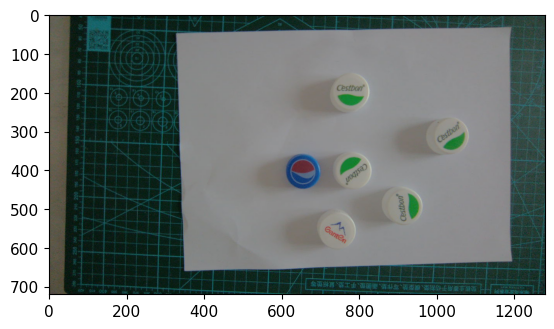

In [6]:
# 采集图像
img_bgr = camera.read_color_img()
# 图像可视化
plt.imshow(img_bgr[:, :, ::-1])

In [7]:
# cv2.imwrite("img_bgr.png", img_bgr)

## 目标检测

In [8]:
# YoloV5 目标检测
canvas, class_id_list, xyxy_list, conf_list = model.detect(img_bgr)


0: 640x1088 6 bottle_caps, 25.3ms
Speed: 4.4ms preprocess, 25.3ms inference, 1.7ms postprocess per image at shape (1, 3, 1088, 1088)


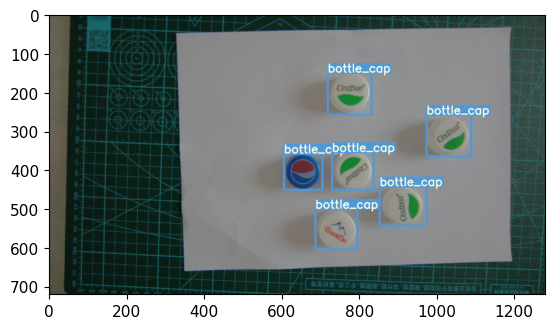

In [9]:
# 展示画布
plt.imshow(canvas[:, :, ::-1])

In [10]:
# cv2.imwrite("canvas.png", canvas)

In [11]:
# 物体类别ID列表
print(class_id_list)

[0, 0, 0, 0, 0, 0]


In [12]:
# 将物体ID转换为类别中文名称
class_id = class_id_list[0]
class_name = model.class_name_dict[class_id]
print(f"类别ID: {class_id} 名称: {class_name}")

类别ID: 0 名称: bottle_cap


In [13]:
# 获取ROI矩形框
x1, y1, x2, y2  = xyxy_list[0]
print("ROI矩形框")
print(f"左上角: x={x1} y={y1}")
print(f"右下角: x={x2} y={y2}")

cx = int(x1 + x2)
cy = int(y1 + y2)
print(f"中心点坐标: cx={cx} cy={cy}")

ROI矩形框
左上角: x=719 y=151
右下角: x=832 y=259
中心点坐标: cx=1551 cy=410


In [14]:
obj_id = 0 
conf = conf_list[obj_id]
print(f"物体序号: {obj_id} 置信度: {conf}")

物体序号: 0 置信度: 0.8516520857810974
